In [52]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [53]:
df = panda.read_csv('NAS.csv')

# Dropping NaN entries 
df.dropna(inplace = True)

#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")

In [54]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=True)

In [55]:
train_date = train.drop("Close", axis = "columns")
test_date = test.drop("Close", axis = "columns")

In [56]:
train_close = train.drop("Date", axis = "columns")
test_close = test.drop("Date", axis = "columns")

In [58]:
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date,train_close)

LinearRegression()

In [59]:
# Converting int dates into DateTime for train_date
train_date_dt = train_date['Date'].apply(dt.datetime.fromordinal)

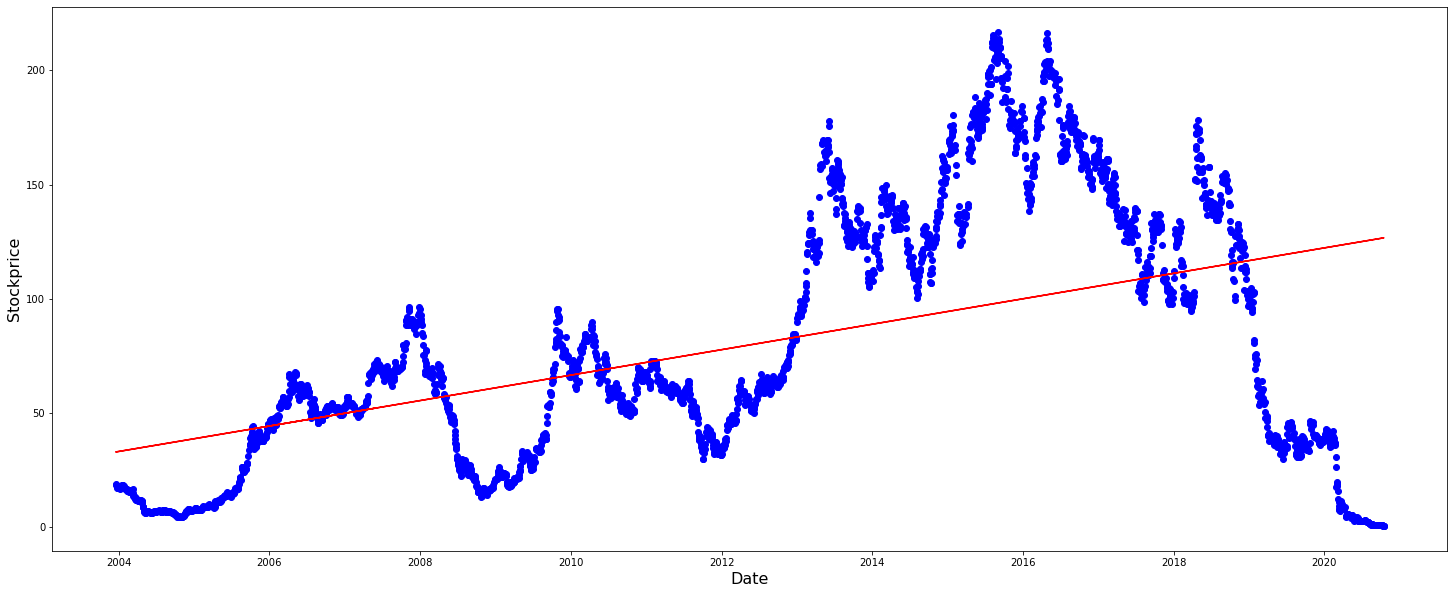

In [60]:
#%matplotlib inline
plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date_dt,train_close,color='blue')
plt.plot(train_date_dt,reg_obj_train.predict(train[['Date']]),color='red')

In [61]:
reg_obj_test = linear_model.LinearRegression()
reg_obj_test.fit(test_date,test_close)
prediction = reg_obj_test.predict(test_date)

In [62]:
print('Coefficients: \n', reg_obj_train.coef_)

Coefficients: 
 [[0.01524447]]


In [63]:
print('Mean squared error: %.2f'
      % mean_squared_error(test_close, prediction))

Mean squared error: 2198.67


In [64]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_close, prediction))

Coefficient of determination: 0.27


In [65]:
# Converting int dates into DateTime for test_date
test_date_dt = test_date['Date'].apply(dt.datetime.fromordinal)

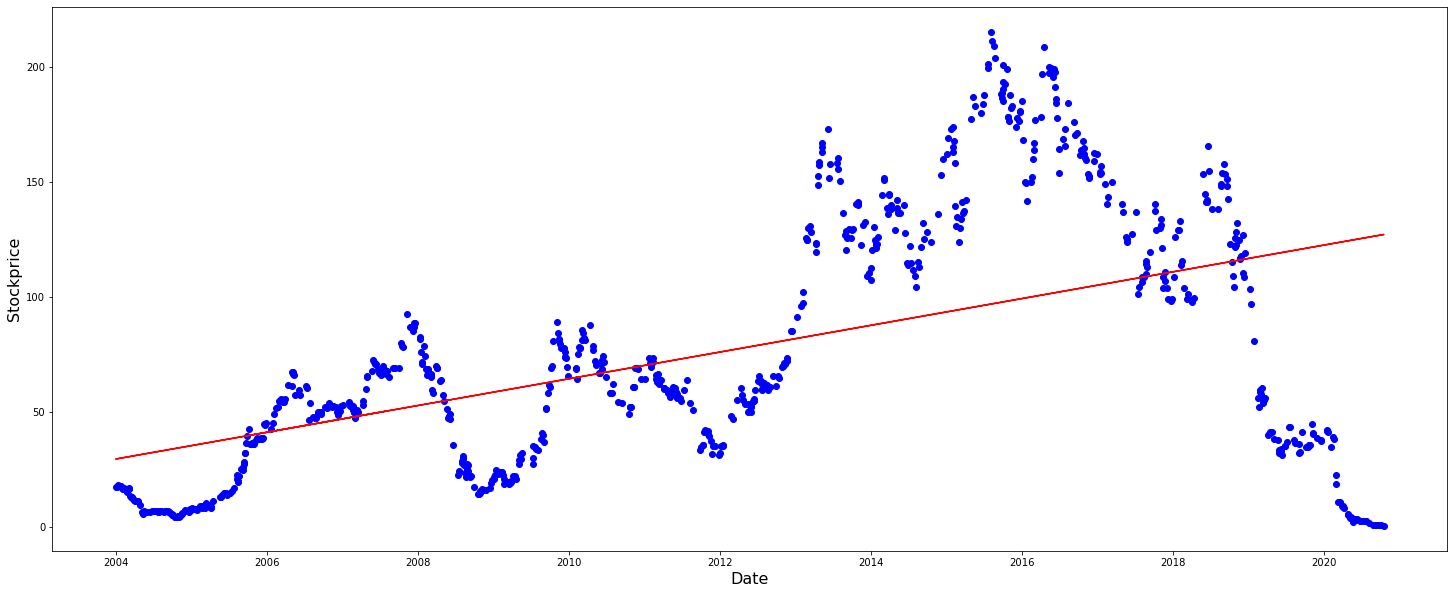

In [66]:
#%matplotlib inline
plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(test_date_dt,test_close,color='blue')
plt.plot(test_date_dt, prediction,color='red')

In [68]:
# Predicting the future
input_date = dt.date(2021, 1, 1)
input_date = input_date.toordinal()
reg_obj_train.predict([[input_date]])

array([[127.91300131]])